Here I used MinMax Scaler for the 1st time, and tried to use cross validation. Altough the loss was minimal after first set, it decreased after last 2 runs.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from itertools import chain
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("drive/MyDrive/Engineer's Project/test.csv")

In [ ]:
df.pop('usa_cpi')
df.pop('pol_cpi')
df.pop('usa_inter')
df.pop('pol_inter')
df.pop('Date')

In [ ]:
df.head()

In [ ]:
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'Opening', 'High', 'Low', 'Closing','Momentum', 'Range', 'ohlc'])

In [ ]:
std = df['Closing'].std()
std_scaled = df_scaled['Closing'].std()

In [ ]:
df_scaled.head()

In [ ]:
float_data = np.array(df_scaled).astype('float32')
#mean = float_data[:2501].mean(axis=0)
stdOld = float_data[:2501].std(axis=0)
stdOldWhole = float_data.std(axis=0)
#float_data -= mean
#float_data /= std
stdOld
stdOldWhole

array([0.19871785, 0.19444253, 0.20236225, 0.19871159, 0.04161202,
       0.06428276, 0.19881721], dtype=float32)

In [ ]:
print(stdOld[3])
print(stdOldWhole[3])

0.19482403
0.19871159


In [ ]:
lookback = 10
step = 1
delay = 1
batch_size = 128

In [ ]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=1):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
        min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][3]
    yield samples, targets

In [ ]:
train_gen1 = generator(float_data,
lookback=lookback,
delay=delay,
min_index=0,
max_index=801,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen1 = generator(float_data,
lookback=lookback,
delay=delay,
min_index=801,
max_index=1001,
step=step,
batch_size=batch_size)

In [ ]:
test_gen1 = generator(float_data,
lookback=lookback,
delay=delay,
min_index=1001,
max_index=1201,
step=step,
batch_size=batch_size)

In [ ]:
val_steps1 = (1001 - 801 - lookback)
test_steps1 = (1201 - 1001 - lookback)

In [ ]:
train_gen2 = generator(float_data,
lookback=lookback,
delay=delay,
min_index=1201,
max_index=2001,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen2 = generator(float_data,
lookback=lookback,
delay=delay,
min_index=2001,
max_index=2201,
step=step,
batch_size=batch_size)

In [ ]:
test_gen2 = generator(float_data,
lookback=lookback,
delay=delay,
min_index=2201,
max_index=2401,
step=step,
batch_size=batch_size)

In [ ]:
val_steps2 = (2201 - 2001 - lookback)
test_steps2 = (2401 - 2201 - lookback)

In [ ]:
train_gen3 = generator(float_data,
lookback=lookback,
delay=delay,
min_index=2401,
max_index=3201,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen3 = generator(float_data,
lookback=lookback,
delay=delay,
min_index=3201,
max_index=3401,
step=step,
batch_size=batch_size)

In [ ]:
test_gen3 = generator(float_data,
lookback=lookback,
delay=delay,
min_index=3401,
max_index=3542,
step=step,
batch_size=batch_size)

In [ ]:
val_steps3 = (3401 - 3201 - lookback)
test_steps3 = (3542 - 3401 - lookback)

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.LSTM(128,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(5,
  activation='softmax',))
model.add(layers.Dense(1))
model.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history = model.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 63s 149ms/step - loss: 0.3250 - val_loss: 0.2279
Epoch 2/200
400/400 [==============================] - 59s 148ms/step - loss: 0.0876 - val_loss: 0.0253
Epoch 3/200
400/400 [==============================] - 59s 147ms/step - loss: 0.0372 - val_loss: 0.0233
Epoch 4/200
400/400 [==============================] - 59s 148ms/step - loss: 0.0289 - val_loss: 0.0195
Epoch 5/200
400/400 [==============================] - 59s 146ms/step - loss: 0.0262 - val_loss: 0.0194
Epoch 6/200
400/400 [==============================] - 58s 146ms/step - loss: 0.0251 - val_loss: 0.0180
Epoch 7/200
400/400 [==============================] - 58s 146ms/step - loss: 0.0242 - val_loss: 0.0177
Epoch 8/200
400/400 [==============================] - 58s 146ms/step - loss: 0.0237 - val_loss: 0.0248
Epoch 9/200
400/400 [==============================] - 58s 146ms/step - loss: 0.0232 - val_loss: 0.0247
Epoch 10/200
400/400 [==============================] - 58s 146m

In [ ]:
eval = model.evaluate(test_gen, steps = test_steps)


511/511 [==============================] - 19s 37ms/step - loss: 0.0308


In [ ]:
eval

0.030848689377307892

In [ ]:
std * eval

0.01174985752848425

In [ ]:
std * 0.0725

0.027614290526123113

In [ ]:
std_scaled = df_scaled['Closing'].std()

In [ ]:
std_scaled * eval

0.006130857137060883

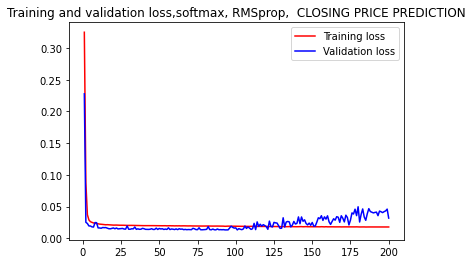

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Training of first set.

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(layers.LSTM(128,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model1.add(layers.Dense(5,
  activation='softmax',))
model1.add(layers.Dense(1))
model1.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history1 = model1.fit(train_gen1,
  steps_per_epoch=400,
  epochs=80,
  validation_data=val_gen1,
  validation_steps=val_steps1)

Epoch 1/80
400/400 [==============================] - 30s 65ms/step - loss: 0.0849 - val_loss: 0.0350
Epoch 2/80
400/400 [==============================] - 25s 62ms/step - loss: 0.0773 - val_loss: 0.0281
Epoch 3/80
400/400 [==============================] - 29s 73ms/step - loss: 0.0392 - val_loss: 0.0166
Epoch 4/80
400/400 [==============================] - 26s 66ms/step - loss: 0.0228 - val_loss: 0.0157
Epoch 5/80
400/400 [==============================] - 22s 54ms/step - loss: 0.0222 - val_loss: 0.0159
Epoch 6/80
400/400 [==============================] - 20s 51ms/step - loss: 0.0218 - val_loss: 0.0170
Epoch 7/80
400/400 [==============================] - 20s 51ms/step - loss: 0.0215 - val_loss: 0.0165
Epoch 8/80
400/400 [==============================] - 20s 50ms/step - loss: 0.0212 - val_loss: 0.0159
Epoch 9/80
400/400 [==============================] - 20s 50ms/step - loss: 0.0210 - val_loss: 0.0176
Epoch 10/80
400/400 [==============================] - 21s 52ms/step - loss: 0.020

In [ ]:
eval1 = model1.evaluate(test_gen1, steps = test_steps1)

190/190 [==============================] - 4s 20ms/step - loss: 0.0067


In [ ]:
std_scaled * eval1

0.001322307428338018

In [ ]:
std * eval1

0.002534217246379431

In [ ]:
print(std_scaled)
print(std)
print(scaler.scale_[3])

0.19873963078543957
0.3808867658775602
0.5217814022168643


Which one to use?

In [ ]:
scaler.scale_[3] * eval1

0.003471654955748945

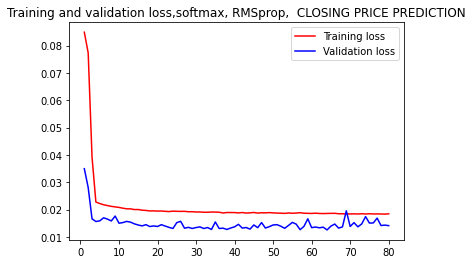

In [ ]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs1 = range(1, len(loss1) + 1)
plt.figure()
plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Training on 2 set.

In [ ]:
history2 = model1.fit(train_gen2,
  steps_per_epoch=400,
  epochs=80,
  validation_data=val_gen2,
  validation_steps=val_steps2)

Epoch 1/80
400/400 [==============================] - 21s 52ms/step - loss: 0.0324 - val_loss: 0.0249
Epoch 2/80
400/400 [==============================] - 20s 49ms/step - loss: 0.0254 - val_loss: 0.0300
Epoch 3/80
400/400 [==============================] - 20s 50ms/step - loss: 0.0248 - val_loss: 0.0250
Epoch 4/80
400/400 [==============================] - 19s 49ms/step - loss: 0.0242 - val_loss: 0.0225
Epoch 5/80
400/400 [==============================] - 20s 51ms/step - loss: 0.0240 - val_loss: 0.0269
Epoch 6/80
400/400 [==============================] - 19s 49ms/step - loss: 0.0236 - val_loss: 0.0287
Epoch 7/80
400/400 [==============================] - 20s 49ms/step - loss: 0.0234 - val_loss: 0.0311
Epoch 8/80
400/400 [==============================] - 20s 49ms/step - loss: 0.0232 - val_loss: 0.0302
Epoch 9/80
400/400 [==============================] - 20s 49ms/step - loss: 0.0231 - val_loss: 0.0380
Epoch 10/80
400/400 [==============================] - 20s 49ms/step - loss: 0.022

In [ ]:
eval2 = model1.evaluate(test_gen2, steps = test_steps2)

190/190 [==============================] - 2s 12ms/step - loss: 0.0461


In [ ]:
std * eval2

0.017546036578284015

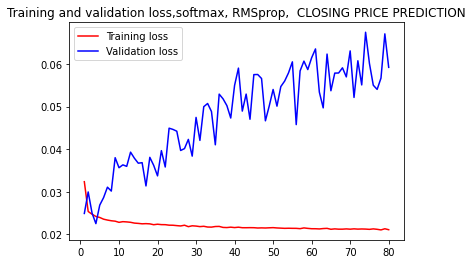

In [ ]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.figure()
plt.plot(epochs2, loss2, 'r', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Training on 3 set.

In [ ]:
history3 = model1.fit(train_gen3,
  steps_per_epoch=400,
  epochs=80,
  validation_data=val_gen3,
  validation_steps=val_steps3)

Epoch 1/80
400/400 [==============================] - 23s 58ms/step - loss: 0.0196 - val_loss: 0.0454
Epoch 2/80
400/400 [==============================] - 20s 49ms/step - loss: 0.0194 - val_loss: 0.0531
Epoch 3/80
400/400 [==============================] - 20s 49ms/step - loss: 0.0192 - val_loss: 0.0465
Epoch 4/80
400/400 [==============================] - 20s 49ms/step - loss: 0.0192 - val_loss: 0.0486
Epoch 5/80
400/400 [==============================] - 21s 53ms/step - loss: 0.0192 - val_loss: 0.0508
Epoch 6/80
400/400 [==============================] - 26s 64ms/step - loss: 0.0189 - val_loss: 0.0500
Epoch 7/80
400/400 [==============================] - 20s 49ms/step - loss: 0.0190 - val_loss: 0.0539
Epoch 8/80
400/400 [==============================] - 20s 50ms/step - loss: 0.0189 - val_loss: 0.0558
Epoch 9/80
400/400 [==============================] - 20s 50ms/step - loss: 0.0189 - val_loss: 0.0519
Epoch 10/80
400/400 [==============================] - 21s 52ms/step - loss: 0.018

In [ ]:
eval3 = model1.evaluate(test_gen3, steps = test_steps3)

131/131 [==============================] - 3s 21ms/step - loss: 0.0802


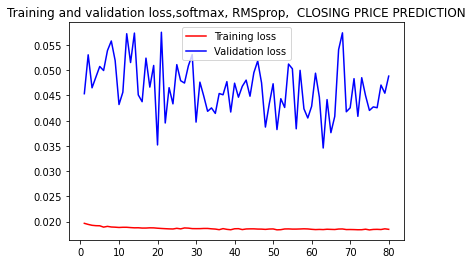

In [ ]:
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs3 = range(1, len(loss3) + 1)
plt.figure()
plt.plot(epochs3, loss3, 'r', label='Training loss')
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()